In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

df = pd.read_csv('./salary.csv')
df

,company,job,degree,salary_more_than_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,masters,1
3,google,business manager,bachelors,0
4,google,computer programmer,masters,0
5,abc pharma,computer programmer,bachelors,1
6,abc pharma,computer programmer,bachelors,1
7,abc pharma,computer programmer,masters,0
8,abc pharma,sales executive,bachelors,1
9,facebook,sales executive,masters,0


In [12]:
from sklearn.preprocessing import LabelEncoder

input = df.drop(['salary_more_than_100k'], axis=1)
target = df['salary_more_than_100k']

In [13]:
le_c = LabelEncoder()
le_j = LabelEncoder()
le_d = LabelEncoder()

In [17]:
input['company_enc'] = le_c.fit_transform(input['company'])
input['job_enc'] = le_j.fit_transform(input['job'])
input['degree_enc'] = le_d.fit_transform(input['degree'])

In [18]:
input

,company,job,degree,company_enc,job_enc,degree_enc
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,masters,2,0,1
3,google,business manager,bachelors,2,0,0
4,google,computer programmer,masters,2,1,1
5,abc pharma,computer programmer,bachelors,0,1,0
6,abc pharma,computer programmer,bachelors,0,1,0
7,abc pharma,computer programmer,masters,0,1,1
8,abc pharma,sales executive,bachelors,0,2,0
9,facebook,sales executive,masters,1,2,1


In [21]:
inputs = input.drop(['company', 'job', 'degree'], axis=1)

In [22]:
target

0     0
1     0
2     1
3     0
4     0
5     1
6     1
7     0
8     1
9     0
10    1
11    0
12    1
13    0
14    0
Name: salary_more_than_100k, dtype: int64

In [26]:
x_train,x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2)

In [43]:
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [45]:
y_pred = model.predict(x_test)

In [46]:
model.score(x_test, y_test)

0.6666666666666666

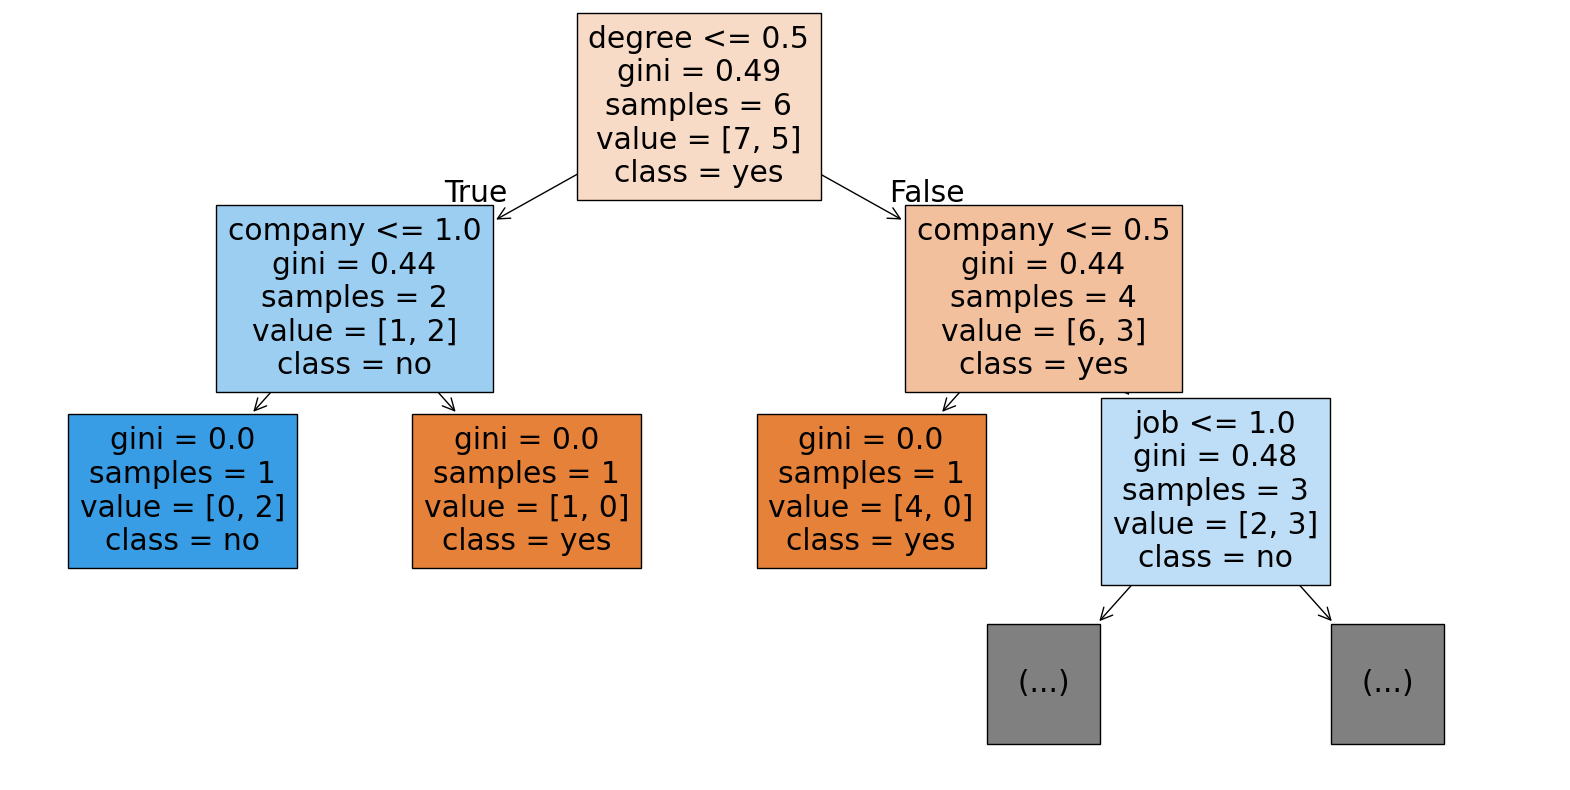

In [47]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

tree = model.estimators_[1]
plt.figure(figsize=(20,10))

plot_tree(tree, feature_names=input.columns,filled=True, class_names = ['yes', 'no'], precision=2, max_depth=2)
plt.show()

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, matthews_corrcoef

def calculate_confusion_matrix_components(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    return TN, FP, FN, TP

TN, FP, FN, TP =calculate_confusion_matrix_components(y_test,y_pred)

In [50]:
def calculate_metrics(TN, FP, FN, TP):
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP / (TP+FP) if (TP + FP) != 0 else 0
    recall = TP / (TP+FN) if (TP+FN) != 0 else 0
    f1_score = 2 * (precison * recall) / (precision+recall) if (precision + recall) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    npv = TN / (TN + FN) if (TN +FN)!=0 else 0
    mcc = (TP*TN - FP*FN)/np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)) if ((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))!=0 else 0

    return accuracy, precision, recall, f1_score, specificity, npv, mcc

metrics = calculate_metrics(TN, FP, FN, TP)
accuracy, precision, recall, f1, specificity, npv, mcc = metrics

In [51]:
print("\nScikit-learn Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Matthews Correlation Coefficient: {matthews_corrcoef(y_test, y_pred)}")


Scikit-learn Metrics:
Accuracy: 0.6666666666666666
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Matthews Correlation Coefficient: 0.0


C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


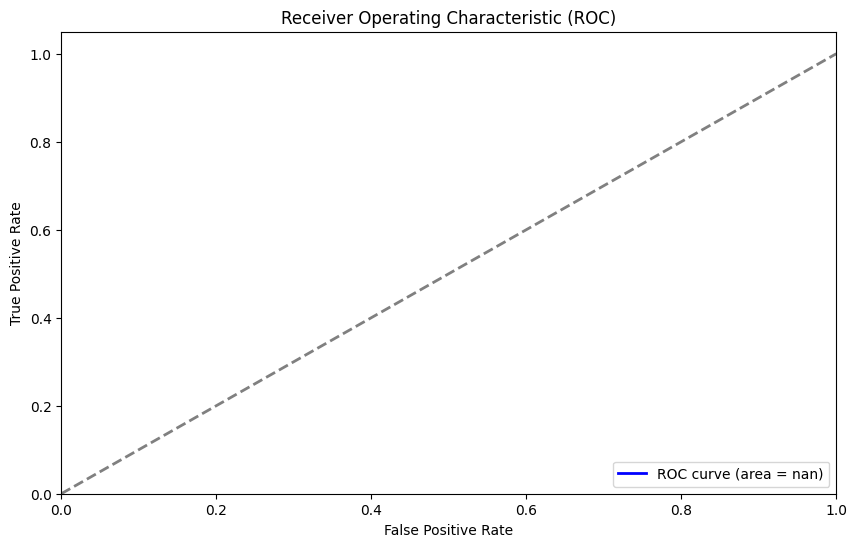

In [52]:
y_pred_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [53]:
random_probs = np.random.rand(len(y_test))
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
random_auc = auc(random_fpr, random_tpr)

print(f"\nAUC for Test Data: {roc_auc}")
print(f"AUC for Random Probabilities: {random_auc}")


AUC for Test Data: nan
AUC for Random Probabilities: nan


C:\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


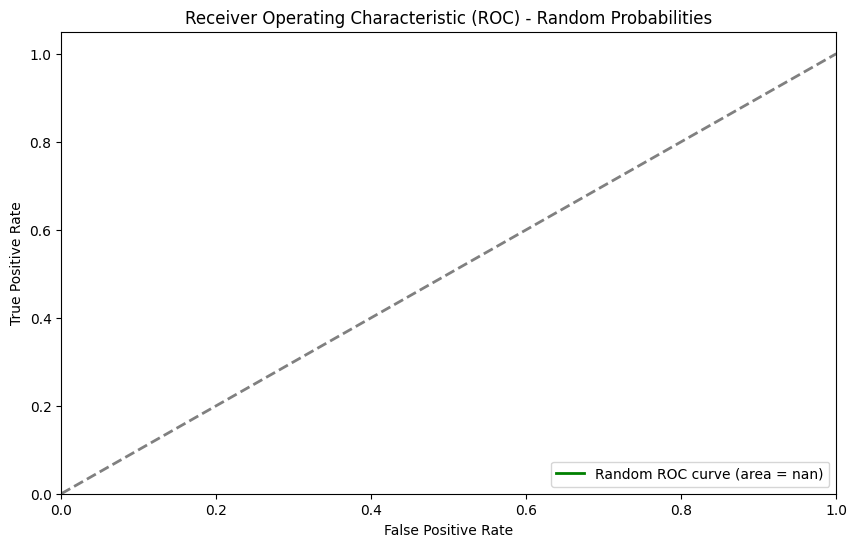

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(random_fpr, random_tpr, color='green', lw=2, label='Random ROC curve (area = %0.2f)' % random_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Probabilities')
plt.legend(loc="lower right")
plt.show()

In [55]:
print("\nInterpretation/Analysis:")
print("1. Accuracy is the ratio of correctly predicted instances to the total instances. Both custom and sklearn implementations provide the same value.")
print("2. Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision indicates a low false positive rate.")
print("3. Recall (Sensitivity) is the ratio of correctly predicted positive observations to all the observations in the actual class. High recall indicates a low false negative rate.")
print("4. F1 Score is the harmonic mean of precision and recall, providing a balance between the two.")
print("5. Specificity is the ratio of correctly predicted negative observations to the total actual negatives.")
print("6. Negative Predictive Value (NPV) is the ratio of correctly predicted negative observations to the total predicted negatives.")
print("7. Matthews Correlation Coefficient (MCC) takes into account true and false positives and negatives and is generally regarded as a balanced measure even if the classes are of very different sizes.")
print("8. The ROC curve illustrates the performance of the classifier by plotting the true positive rate against the false positive rate. The AUC value indicates the overall ability of the model to discriminate between positive and negative classes.")
print("9. The random AUC value provides a baseline to compare the model's AUC. A significant difference between the model's AUC and random AUC indicates the model's effectiveness.")


Interpretation/Analysis:
1. Accuracy is the ratio of correctly predicted instances to the total instances. Both custom and sklearn implementations provide the same value.
2. Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision indicates a low false positive rate.
3. Recall (Sensitivity) is the ratio of correctly predicted positive observations to all the observations in the actual class. High recall indicates a low false negative rate.
4. F1 Score is the harmonic mean of precision and recall, providing a balance between the two.
5. Specificity is the ratio of correctly predicted negative observations to the total actual negatives.
6. Negative Predictive Value (NPV) is the ratio of correctly predicted negative observations to the total predicted negatives.
7. Matthews Correlation Coefficient (MCC) takes into account true and false positives and negatives and is generally regarded as a balanced measure even if the classes a